# Logistic Regression Example

### 生成数据集， 看明白即可无需填写代码
#### '<font color="blue">+</font>' 从高斯分布采样 (X, Y) ~ N(3, 6, 1, 1, 0).<br>
#### '<font color="green">o</font>' 从高斯分布采样  (X, Y) ~ N(6, 3, 1, 1, 0)<br>

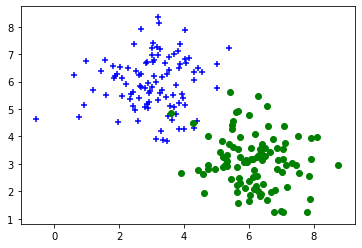

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.cm as cm
import numpy as np
np.random.seed(1234)
%matplotlib inline

dot_num = 100
x_p = np.random.normal(3., 1, dot_num)
y_p = np.random.normal(6., 1, dot_num)
y = np.ones(dot_num)
C1 = np.array([x_p, y_p, y]).T

x_n = np.random.normal(6., 1, dot_num)
y_n = np.random.normal(3., 1, dot_num)
y = np.zeros(dot_num)
C2 = np.array([x_n, y_n, y]).T

plt.scatter(C1[:, 0], C1[:, 1], c='b', marker='+')
plt.scatter(C2[:, 0], C2[:, 1], c='g', marker='o')

data_set = np.concatenate((C1, C2), axis=0)
np.random.shuffle(data_set)


## 建立模型
建立模型类，定义loss函数，定义一步梯度下降过程函数

填空一：实现sigmoid的交叉熵损失函数(不使用tf内置的loss 函数)
$$y=labels$$
$$logits_{ij}=pred_{ij}$$
$$p_{ij}=sigmoid(logits_{ij})=\frac{1}{(1+e^{-logits_{ij}})}$$
$$loss_{ij}=-[y_{ij}*lnp_{ij}+(1-y_{ij})ln(1-p_{ij})]$$

In [49]:
epsilon = 1e-12
class LogisticRegression():
    def __init__(self):
        self.W = tf.Variable(shape=[2, 1], dtype=tf.float32, 
            initial_value=tf.random.uniform(shape=[2, 1], minval=-0.1, maxval=0.1))
        self.b = tf.Variable(shape=[1], dtype=tf.float32, initial_value=tf.zeros(shape=[1]))
        
        self.trainable_variables = [self.W, self.b]
    @tf.function
    def __call__(self, inp):
        logits = tf.matmul(inp, self.W) + self.b # shape(N, 1)
        pred = tf.nn.sigmoid(logits)
        return pred

@tf.function
def compute_loss(pred, label):
    if not isinstance(label, tf.Tensor):
        label = tf.constant(label, dtype=tf.float32)
    pred = tf.squeeze(pred, axis=1)
    '''============================='''
    #输入label shape(N,), pred shape(N,)
    #输出 losses shape(N,) 每一个样本一个loss
    #todo 填空一，实现sigmoid的交叉熵损失函数(不使用tf内置的loss 函数)
#     losses=tf.nn.sigmoid_cross_entropy_with_logits(logits=pred,labels=label) # 内置loss函数
#  参考博客  https://blog.csdn.net/qq_22979337/article/details/84984800
#     losses=pred - pred * label + tf.math.log(1 + tf.math.exp(-tf.math.abs(pred))) # sigmoid化简 可以
    losses=-(label*tf.math.log(tf.sigmoid(pred))+(1-label)*tf.math.log(1-tf.sigmoid(pred)))  # 直接用公式求解
    '''============================='''
    loss = tf.reduce_mean(losses)
    
    pred = tf.where(pred>0.5, tf.ones_like(pred), tf.zeros_like(pred))
    accuracy = tf.reduce_mean(tf.cast(tf.equal(label, pred), dtype=tf.float32))
    return loss, accuracy
@tf.function
def train_one_step(model, optimizer, x, y):
    with tf.GradientTape() as tape:
        pred = model(x)
        loss, accuracy = compute_loss(pred, y)
        
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss, accuracy, model.W, model.b

### 实例化一个模型，进行训练

In [50]:
if __name__ == '__main__':
    model = LogisticRegression()
    opt = tf.keras.optimizers.SGD(learning_rate=0.01)
    x1, x2, y = list(zip(*data_set))
    x = list(zip(x1, x2))
    animation_fram = []
    
    for i in range(500):
        loss, accuracy, W_opt, b_opt = train_one_step(model, opt, x, y)
        animation_fram.append((W_opt.numpy()[0, 0], W_opt.numpy()[1, 0], b_opt.numpy(), loss.numpy()))
        if i%20 == 0:
            print(f'loss: {loss.numpy():.4}\t accuracy: {accuracy.numpy():.4}')

loss: 0.6988	 accuracy: 0.96
loss: 0.6807	 accuracy: 0.78
loss: 0.6674	 accuracy: 0.705
loss: 0.6571	 accuracy: 0.705
loss: 0.6487	 accuracy: 0.725
loss: 0.6414	 accuracy: 0.76
loss: 0.6349	 accuracy: 0.81
loss: 0.6289	 accuracy: 0.845
loss: 0.6233	 accuracy: 0.865
loss: 0.6182	 accuracy: 0.875
loss: 0.6135	 accuracy: 0.885
loss: 0.6092	 accuracy: 0.895
loss: 0.6052	 accuracy: 0.91
loss: 0.6015	 accuracy: 0.925
loss: 0.5981	 accuracy: 0.93
loss: 0.5949	 accuracy: 0.935
loss: 0.592	 accuracy: 0.935
loss: 0.5893	 accuracy: 0.95
loss: 0.5867	 accuracy: 0.96
loss: 0.5844	 accuracy: 0.96
loss: 0.5822	 accuracy: 0.96
loss: 0.5801	 accuracy: 0.96
loss: 0.5782	 accuracy: 0.96
loss: 0.5764	 accuracy: 0.96
loss: 0.5747	 accuracy: 0.96


## 结果展示，无需填写代码

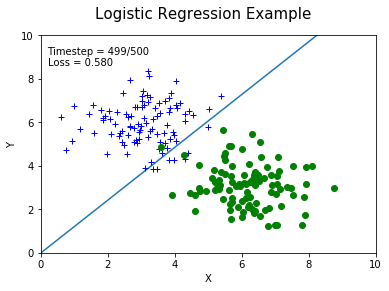

In [41]:

f, ax = plt.subplots(figsize=(6,4))
f.suptitle('Logistic Regression Example', fontsize=15)
plt.ylabel('Y')
plt.xlabel('X')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

line_d, = ax.plot([], [], label='fit_line')
C1_dots, = ax.plot([], [], '+', c='b', label='actual_dots')
C2_dots, = ax.plot([], [], 'o', c='g' ,label='actual_dots')


frame_text = ax.text(0.02, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
# ax.legend()

def init():
    line_d.set_data([],[])
    C1_dots.set_data([],[])
    C2_dots.set_data([],[])
    return (line_d,) + (C1_dots,) + (C2_dots,)

def animate(i):
    xx = np.arange(10, step=0.1)
    a = animation_fram[i][0]
    b = animation_fram[i][1]
    c = animation_fram[i][2]
    yy = a/-b * xx +c/-b
    line_d.set_data(xx, yy)
        
    C1_dots.set_data(C1[:, 0], C1[:, 1])
    C2_dots.set_data(C2[:, 0], C2[:, 1])
    
    frame_text.set_text('Timestep = %.1d/%.1d\nLoss = %.3f' % (i, len(animation_fram), animation_fram[i][3]))
    
    return (line_d,) + (C1_dots,) + (C2_dots,)

anim = animation.FuncAnimation(f, animate, init_func=init,
                               frames=len(animation_fram), interval=30, blit=True)

HTML(anim.to_html5_video())

